Take simple regression $y = mx + b$ :  
y is a function of multiple variables, in this case m and b  
Therefore, we can't calculate full derivative $dy/dm$ or $dy/db$

Thus, **Patial Derivatives** enable the calculation of derivatives of multivariate equations. 

Consider $z = x^2 - y^2$  
The partial derivative of $z$ wrt to $x$ is obtained by considering $y$ to be a constant.  
and vice versa. 

### Partial Derivatives of Multivariate Functions
Define a funcrion $f(x, y) for z = x^2 - y^2$

In [1]:
import numpy as np 
import torch 
import matplotlib.pyplot as plt
import math # constant pu

The partial derivative of $z$ wrt to $x$ is obtained by considering $y$ to be a constant.  

In [2]:
def f(my_x, my_y): 
    return my_x**2 - my_y**2

Plot $z$ wrt $x$ by varying $x$

In [3]:
xs = np.linspace(-3, 3 , 1000)

while holding $y$ constant (eg at $y=0$)

In [4]:
zs_wrt_x = f(xs, 0)

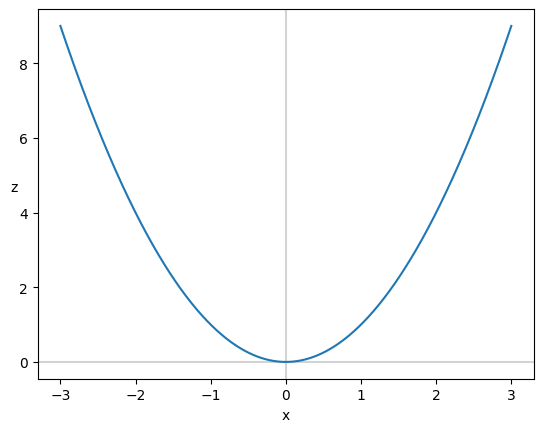

In [5]:
fig , ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')

plt.xlabel('x')
plt.ylabel('z', rotation=0)
_ = ax.plot(xs, zs_wrt_x)


To determine the slope of $z$ w.r.t. $x$ at a given point along the curve, we can use the partial derivative from the slides: $$ \frac{\partial z}{\partial x} = 2x$$

In [6]:
def delz_delx(my_x, my_y):
    return 2*my_x

In [7]:
x_samples = [-2, -1, 0, 1, 2]

In [8]:
colors = ['red', 'orange', 'green' , 'blue' , 'purple']

In [9]:
def point_and_tangent_wrt_x(my_xs, my_x, my_y, my_f, fprime, col):

    my_z = my_f(my_x, my_y) # z = f(x, y) 
    plt.scatter(my_x, my_z, c=col, zorder=3) 
    
    tangent_m = fprime(my_x, my_y) # Slope is partial derivative of f(x, y) w.r.t. x
    tangent_b = my_z - tangent_m*my_x # Line is z=mx+b, so b=z-mx
    tangent_line = tangent_m*my_xs + tangent_b
    
    plt.plot(my_xs, tangent_line, c=col, 
             linestyle='dashed', linewidth=0.7, zorder=3)

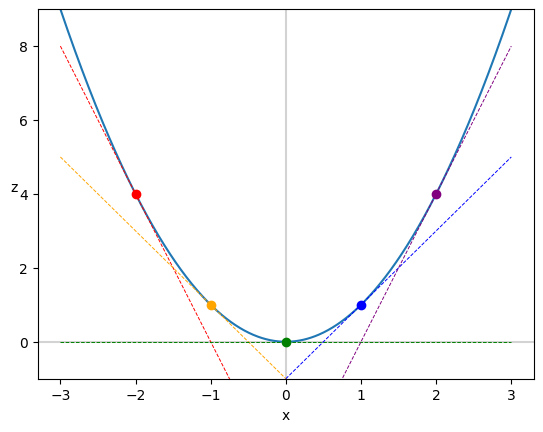

In [10]:
fig, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')

for i, x in enumerate(x_samples):
    point_and_tangent_wrt_x(xs, x, 0, f, delz_delx, colors[i])

plt.ylim(-1, 9)
plt.xlabel('x')
plt.ylabel('z', rotation=0)
_ = ax.plot(xs, zs_wrt_x)

Thereby visually demonstrating $\frac{\partial z}{\partial x} = 2x$. 

That is, the slope of $z$ along the $x$ axis is *twice* the $x$ value. 

The partial derivative of $z$ wrt to $y$ is obtained by considering $x$ to be a constant.  

Plot $z$ wrt $x$ by varying $x$

In [11]:
ys = np.linspace(-3, 3, 1000)

while holding x constant (e.g. at x = 0)

In [12]:
zs_wrt_y = f(0, ys)

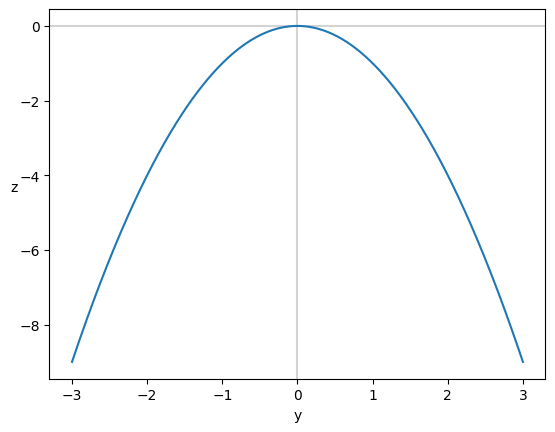

In [13]:
fig, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')

plt.xlabel('y')
plt.ylabel('z', rotation=0)
_ = ax.plot(ys, zs_wrt_y)

As in the slides, the partial derivative of $z$ w.r.t $y$ happens to be independent of $x$ (just as we observed $x$ is independent of $y$ above), so while $z$ varies as a function of both $x$ and $y$, the slope of $z$ w.r.t $y$ is the same no matter what $x$ is: $$ \frac{\partial z}{\partial y} = -2y $$

So for example, holding $x$ constant at 2 instead of 0 increases $z$, but has no impact whatsoever on the slope of $z$ w.r.t. $y$: 

In [14]:
zs_wrt_y = f(2, ys)

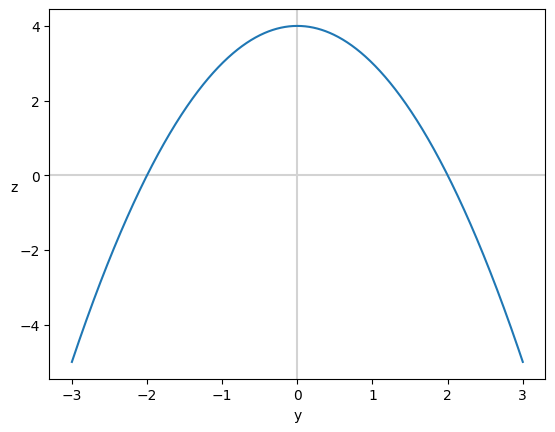

In [15]:
fig, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')

plt.xlabel('y')
plt.ylabel('z', rotation=0)
_ = ax.plot(ys, zs_wrt_y)

In [16]:
def delz_dely(my_x, my_y):
    return -2*my_y

In [17]:
y_samples = [-2, -1, 0, 1, 2]

In [18]:
def point_and_tangent_wrt_y(my_ys, my_x, my_y, my_f, fprime, col): # changed my_xs to my_ys

    my_z = my_f(my_x, my_y) 
    plt.scatter(my_y, my_z, c=col, zorder=3) # changed my_x to my_y
    
    tangent_m = fprime(my_x, my_y) 
    tangent_b = my_z - tangent_m*my_y # changed my_x to my_y
    tangent_line = tangent_m*my_ys + tangent_b # changed my_xs to my_ys
    
    plt.plot(my_ys, tangent_line, c=col, 
             linestyle='dashed', linewidth=0.7, zorder=3) # changed my_xs to my_ys

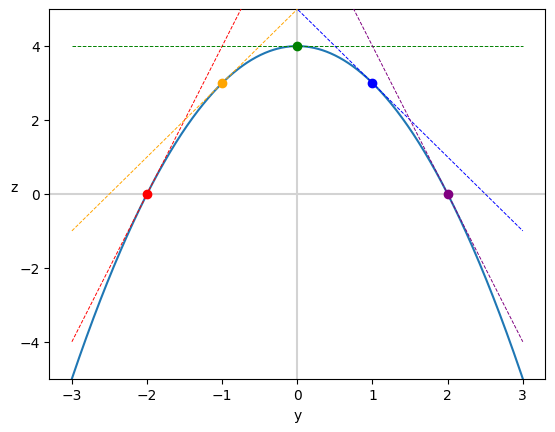

In [19]:
fig, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')

for i, y in enumerate(y_samples):
    point_and_tangent_wrt_y(ys, 2, y, f, delz_dely, colors[i])

plt.ylim(-5, 5)
plt.xlabel('y')
plt.ylabel('z', rotation=0)
_ = ax.plot(xs, zs_wrt_y)

Thereby visually demonstrating $\frac{\partial z}{\partial y} = -2y$. 

That is, the slope of $z$ along the $y$ axis is *twice* the $y$ value *and inverted*, resulting in the parabolic curve opening downward.

### Partial derivative with autodiff in Torch

In [20]:
x = torch.tensor(0.).requires_grad_()
x

tensor(0., requires_grad=True)

In [21]:
y = torch.tensor(0.).requires_grad_()
y 

tensor(0., requires_grad=True)

In [22]:
z = f(x, y) #forward pass 
z

tensor(0., grad_fn=<SubBackward0>)

In [23]:
z.backward() # Autodiff

As we already knew from our exercises above, the slope of the point (0, 0, 0) is zero with respect to both the $x$ and $y$ axes: 

In [24]:
x.grad

tensor(0.)

In [25]:
y.grad

tensor(-0.)

excersie 

In [26]:
x = torch.tensor(-2.).requires_grad_()
x

tensor(-2., requires_grad=True)

In [27]:
y = torch.tensor(-2.).requires_grad_()
y 

tensor(-2., requires_grad=True)

In [28]:
z = f(x, y) #forward pass 
z

tensor(0., grad_fn=<SubBackward0>)

In [29]:
z.backward()

In [30]:
x.grad

tensor(-4.)

In [31]:
y.grad

tensor(4.)

Partial derivatives of a cylinder's volume

Partial derivative wrt l

In [32]:
def cylinder_vol(my_r, my_l):
    return math.pi * my_r**2 * my_l

In [33]:
# radius is 3 
r = torch.tensor(3.).requires_grad_()
r

tensor(3., requires_grad=True)

In [34]:
# length is 5
l = torch.tensor(5.).requires_grad_()
l

tensor(5., requires_grad=True)

In [35]:
# volume 
v = cylinder_vol(r, l)
v

tensor(141.3717, grad_fn=<MulBackward0>)

In [36]:
v.backward()

In [37]:
l.grad 

tensor(28.2743)

In [38]:
# should be equal to dv/dl = pi*r**2
math.pi * 3 ** 2

28.274333882308138

THis means that r = 3 , a change in l by one unit corresponds to change in v of 28.27. this we can prove ourselves

In [39]:
# diffrence of vol in one unitchanfe in l
cylinder_vol(3,6) - cylinder_vol(3,5)

28.274333882308127

In [40]:
cylinder_vol(3,7)-cylinder_vol(3,6)

28.274333882308156

thus on every unit change of l change in v is 28.27 $m^3$

Partial derivative of volume wrt to r 
on taking pd of volume $\pi$*$r^2l$ we get 2*$\pi$*$rl$, which means,  
a change in radius r corresponds to a change in volume by 2*$\pi$*$rl$

In [41]:
r.grad

tensor(94.2478)

In [42]:
2 * math.pi * 3 * 5 # r = 3 , l = 5 , hardcoding as r and l are tensors

94.24777960769379

In [43]:
delta = 1e-6 # derivative apply at an infinitesimally small del(r). The smaller the r the closer it is to true partial derivative of r wrt volume

In [44]:
(cylinder_vol(3 + delta, 5) - cylinder_vol(3, 5)) / delta # dividing by delta restores r

94.24779531741478